<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 3

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: Notation 

### Problem 1.1 (Exam Style)

$a = 0$ 

$b = (1, 0)$

### Problem 1.2 (Exam Style)

### Problem 1.3 (Exam Style)

### Problem 1.4 (Exam Style)

## Part 2: Momentum 

### Problem 2.1 (Exam Style)

### Problem 2.1 (Exam Style)

### Problem 2.2

In [450]:
def gradient_descent(g, z0, alpha=0.1, delta=1.e-6, k_max=30, store=True):
    z, z_old = z0, z0.copy()
    history = [z] if store else None
    for k in range(k_max):
        z = z_old - alpha * g(z_old)
        if store:
            history.append(z)
        if np.linalg.norm(z - z_old) <= delta:
            return (z, history) if store else z
        z_old = z
    print('warning: maximum iterations exceeded')
    return (z, history) if store else z

### Problem 2.3 (Exam Style)

## Part 3: Automatic Differentiation

In [451]:
import numpy as np
import matplotlib.pyplot as plt
from autograd import numpy as anp
from autograd import elementwise_grad as gradient

### Problem 3.1 (Exam Style except for the Plots)

#### Answer

We compute the derivative and gradient of the following function 
$$ h(x) = \frac{1}{1+a e^{-bx}} $$

**Derivative $h'(x)$**
$$
\begin{align}
    h'(x) &= \frac{d}{dx} \frac{1}{1+a e^{-bx}} \\
    &= \frac{-(1+a e^{-bx})'}{(1+a e^{-bx})^2} \\
    &= \frac{ab e^{-bx}}{(1+a e^{-bx})^2} \\
\end{align}
$$

**Gradient $g(a, b)$**
$$
\begin{align}
    g(a, b) &= \begin{bmatrix}
                \frac{\partial}{\partial a} \frac{1}{1+a e^{-bx}}  \\
                \frac{\partial}{\partial b} \frac{1}{1+a e^{-bx}}
            \end{bmatrix}
            &= \begin{bmatrix}
                \frac{-e^{-bx}}{(1+a e^{-bx})^2} \\
                \frac{ax e^{-bx}}{(1+a e^{-bx})^2}
            \end{bmatrix}

\end{align}

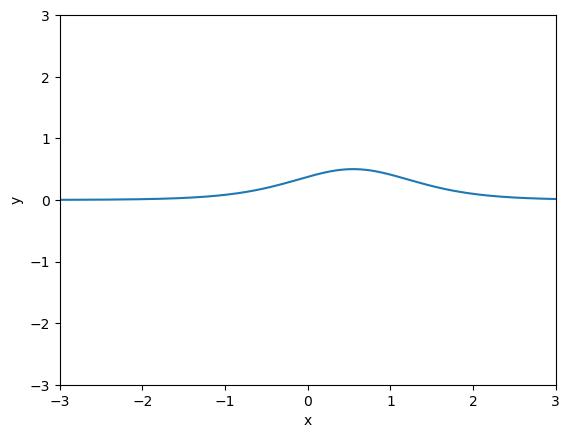

In [452]:
def d_h(x, z):
    a, b = z
    return a*b*np.exp(-b*x) / (1 + a*np.exp(-b*x))**2

def plot_derivative(d=d_h, z=[3, 2]):
    x_range = np.linspace(-3, 3, 300)
    plt.plot(x_range, d(x_range, z), label="h\'(x)")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plot_derivative(d_h)

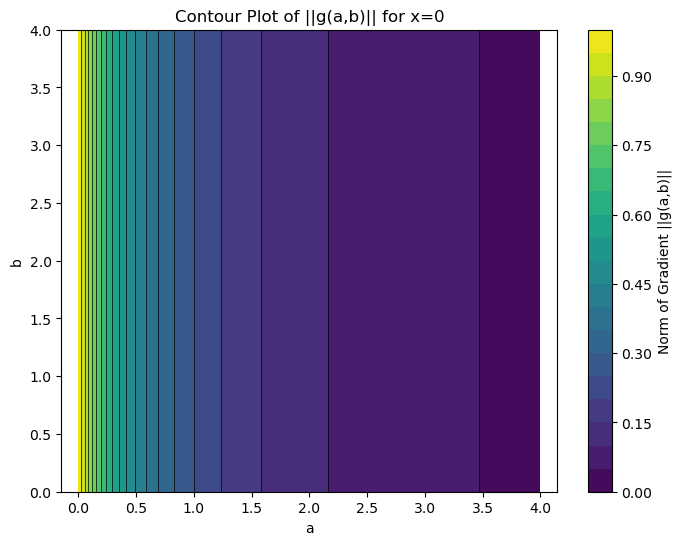

In [453]:
def g(x, z):
    a, b = z
    return np.array([
        -np.exp(-b * x) / (1 + a*np.exp(-b * x))**2,
        a*x*np.exp(-b * x) / (1 + a*np.exp(-b * x))**2
    ])

def y(x, z):
    a, b = z
    return np.linalg.norm(g(x, [a, b]), axis=0)

def set_up_grid(f=y):
    a_range = np.linspace(0, 4, 100)
    b_range = np.linspace(0, 4, 100)
    A, B = np.meshgrid(a_range, b_range)
    Z = f(0, [A, B])
    return [A, B, Z]

[A, B, Z] = set_up_grid(y)

def plot_contour(a=A, b=B, z=Z):
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(a, b, z, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Norm of Gradient ||g(a,b)||')
    plt.contour(A, B, Z, levels=20, colors='black', linewidths=0.5)
    plt.axis('equal')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of ||g(a,b)|| for x=0')

[A, B, Z] = set_up_grid(y)
plot_contour(A, B, Z)
plt.show()

### Problem 3.2

In [454]:
def ah(x, z):
    a, b = z[0], z[1]
    return 1 / (1 + a * anp.exp(-b * x))

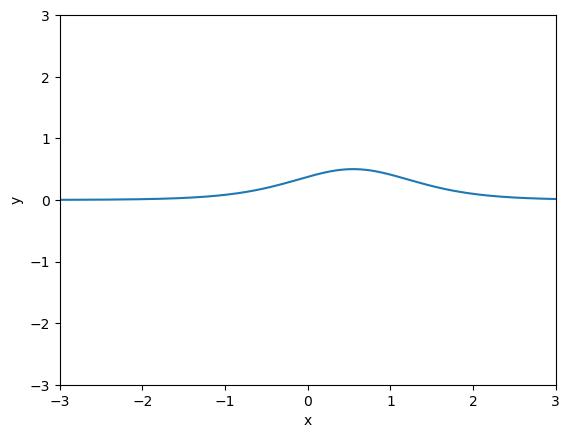

In [455]:
ad_h = gradient(ah)

plot_derivative(d=ad_h)

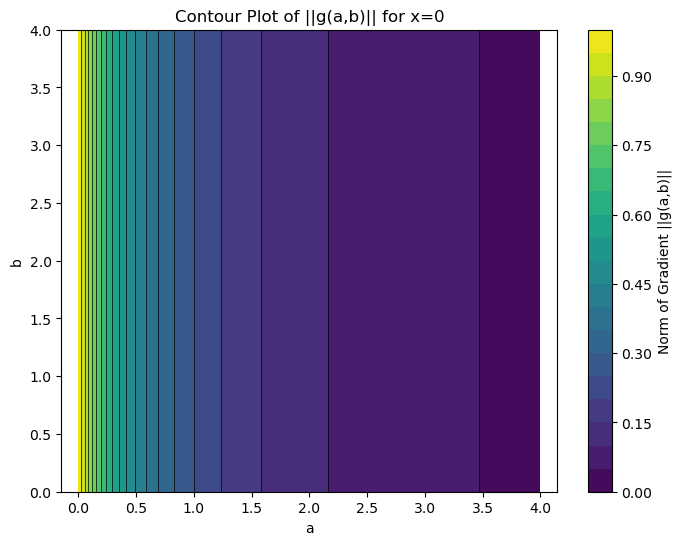

In [456]:
a_g = gradient(ah, 1)

def a_y(x, z):
    a, b = z
    grad_vector = a_g(x, [a, b])
    return np.linalg.norm(grad_vector, axis=0)

[A, B, Z] = set_up_grid(a_y)
plot_contour(A, B, Z)


# Part 4: Stochastic Gradient Descent

In [457]:
def batch_index_generator(n_samples, batch_size, rg):
    batch = rg.permutation(n_samples)
    start, stop = 0, batch_size
    while stop < n_samples:
        yield batch[start:stop]
        start += batch_size
        stop += batch_size
    stop = min(stop, n_samples)
    yield batch[start:stop]

### Problem 4.1 (Exam Style)

$$
\begin{align}
    L_T(\vec{z}) &= \frac{1}{N} \sum_{n=0}^{N-1} l(y_n, h_z(x_n)) \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} (h_z(x_n) - y_n)^2 \\
    \nabla L_T(\vec{z}) &= \frac{1}{N} \sum_{n=0}^{N-1} \nabla (h_z(x_n) - y_n)^2 \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} 2g_{z}(x_n) \cdot (h_z(x_n) - y_n)
\end{align}
$$

### Problem 4.2

In [458]:
def gradient_descent(g, z0, alpha=0.01, delta=1.e-6, k_max=100000, store=True):
    z, z_old = z0, z0.copy()
    history = [z] if store else None
    for k in range(k_max):
        z = z_old - alpha * g(z_old)
        if store:
            history.append(z)
        if np.linalg.norm(z - z_old) <= delta:
            return (z, history) if store else z
        z_old = z
    print('warning: maximum iterations exceeded')
    return (z, history) if store else z

In [459]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [460]:
def retrieve(file_name, semester='fall25', homework=3):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [461]:
file_name = 'logistic_samples.pkl'
retrieve(file_name)
with open(file_name, "rb") as file:
    training_set = pickle.load(file)

Using previously downloaded file logistic_samples.pkl


Given Code for the contour plot

In [462]:
def hz(z, x):
    a, b = np.array(z[0]), np.array(z[1])
    return 1 / (1 + a[..., np.newaxis] * np.exp(- b[..., np.newaxis] * x))

In [463]:
def risk(z, x, y):
    y_hat = hz(z, x)
    return np.squeeze(np.mean((y[np.newaxis, np.newaxis, ...] - y_hat) ** 2, axis=-1))

In [464]:
def risk_on_t(z):
    return risk(z, training_set['x'], training_set['y'])


box, grid_samples = [0, 4, 0, 4], 200
z0, z1 = np.meshgrid(
    np.linspace(box[0], box[1], grid_samples),
    np.linspace(box[2], box[3], grid_samples)
)

risk_array = risk_on_t([z0, z1])

Code for the SGD

In [465]:
def gz(z, x):
    a, b = np.array(z[0]), np.array(z[1])
    return np.array([
        -np.exp(-b * x) / (1 + a*np.exp(-b * x))**2,
        a*x*np.exp(-b * x) / (1 + a*np.exp(-b * x))**2
    ])

def risk_gradient(z, x, y):
    y_hat = hz(z, x)
    return np.squeeze(np.mean(2 * gz(z, x) * (y_hat - y), axis=-1))

In [466]:


def sgd(g, t, z0, alpha=0.1, delta=1.e-6, k_max=10000, batch_size=None, store=True):
    z, z_old = np.array(z0, dtype=float), np.array(z0, dtype=float)
    X, Y = t['x'], t['y']
    history = [z.copy()] if store else None
    n_samples = len(t['y'])
    
    rg = np.random.default_rng(3)
    batch_size = batch_size if batch_size is not None else n_samples
    batch_generator = batch_index_generator(n_samples, batch_size, rg)
    
    for k in range(k_max):
        try:
            indices = next(batch_generator)
        except StopIteration:
            batch_generator = batch_index_generator(n_samples, batch_size, rg)
            indices = next(batch_generator)
        
        grad = g(z_old, X[indices], Y[indices])
        z = z_old - alpha * grad
        
        if store:
            history.append(z.copy())
        if np.linalg.norm(z - z_old) <= delta:
            return (z, history) if store else z
        z_old = z
    print('warning: maximum iterations exceeded')
    return (z, history) if store else z

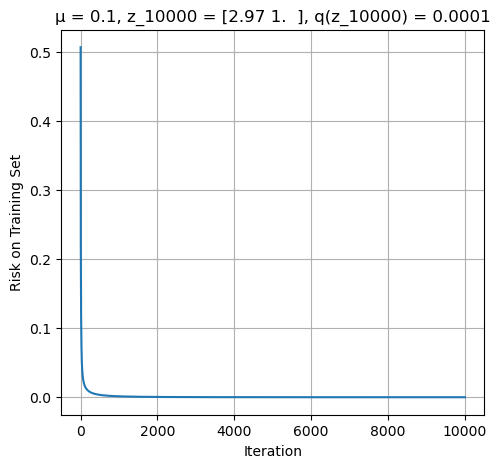

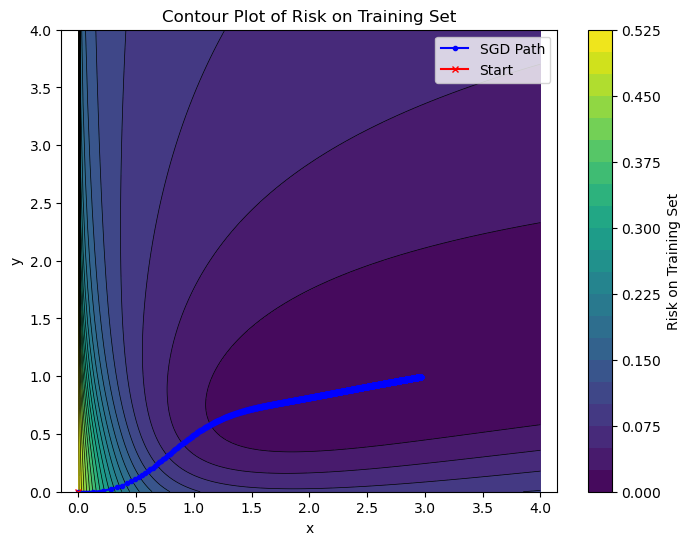

In [467]:
def contour_path_plot(x, y, z, history):
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(x, y, z, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Risk on Training Set')
    plt.contour(x, y, z, levels=20, colors='black', linewidths=0.5)
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot of Risk on Training Set')
    history = np.array(history)
    plt.plot(history[:, 0], history[:, 1], marker='o', color='blue', markersize=3, label='SGD Path')
    plt.plot(history[0, 0], history[0, 1], marker='x', color='red', markersize=5, label='Start')
    plt.legend()
    plt.show()
    
def risk_iteration_plot(history, alpha=0.1):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    risk_history = [risk_on_t(p) for p in history]
    plt.plot(risk_history)
    plt.xlabel('Iteration')
    plt.ylabel('Risk on Training Set')

    last_step = len(history) - 1
    z_last = history[-1]
    q_z_last = risk_history[-1]
    title = (f'μ = {alpha}, z_{last_step} = {np.round(z_last, 2)}, '
             f'q(z_{last_step}) = {q_z_last:.4f}')
    plt.title(title)
    
    plt.grid(True)


z_start = [0, 0]
z_final_batch, history_batch = sgd(risk_gradient, training_set, z_start, batch_size=None)
risk_iteration_plot(history_batch)
contour_path_plot(z0, z1, risk_array, history_batch)
    
    


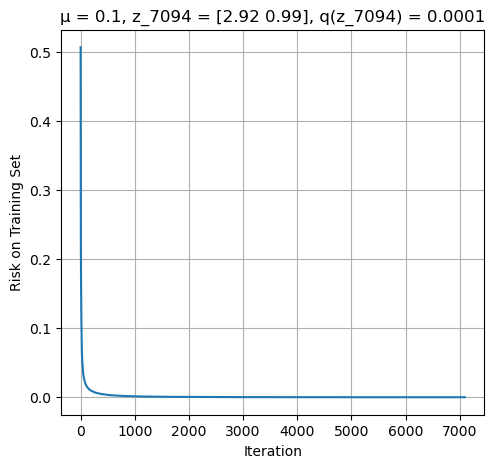

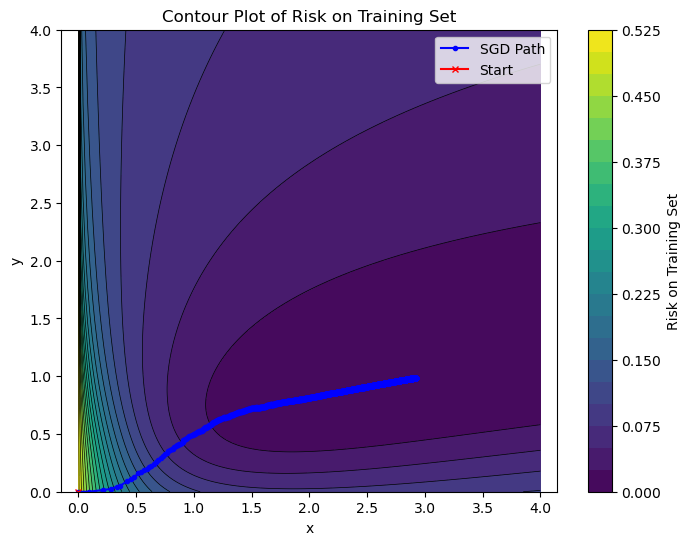

In [468]:
z_final_batch, history_batch = sgd(risk_gradient, training_set, z_start, batch_size=10)
risk_iteration_plot(history_batch)
contour_path_plot(z0, z1, risk_array, history_batch)

### Problem 4.3 (Exam Style)


>   How does SGD compare with regular Gradient Descent (GD) when `batch_size` is equal to the number of samples in the training set?

**Answer 1.**

Since we are using a single batch we form the problem into our original GD and have the same performance.

---




> State the total number of batches (in a full run of `sgd`, not per epoch) that were processed with `batch_size` set to `None` and with `batch_size` set to `10`, respectively.

**Asnwer 2.**

- `batch_size = None` $\Rightarrow$ `last = 10000`
- `batch_size = 10` $\Rightarrow$ `last = 7094`

---

> Convert those numbers to cost units. That is, what is the total cost of your run when `sgd` is called with `batch_size` set to `None`? And when `batch_size` is `10`?

**Answer 3**

Processing a batch with $k$ samples cost $k$ cost units

For `batch_size = None` We default to processing the whole batch. This means `batch_size = 500` and we processed `10000` batches, one per iteration. Therefore we get
- `cost units = 10000 * 500 = 5,000,000`

For `batch_size = 10` We proces batches of 10. We processed `7094` batches, one per iteration. Therefore we get
- `cost units = 7094 * 10 = 70,940`

---

> Can SGD beat GD in terms of computational efficiency?

**Answer 4** 

SGD clearly beats our version with `batch_size = None` which is equivalent to GD. Therefore it is a lot more cost efficient, a lot less cost units for training. 
